<a href="https://colab.research.google.com/github/prakash22031997/SPARKS-FOUNDATION-TASK-1/blob/main/Sparks_Foundation_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation : Data Science and Business Analytics Internship**
Task 1 : Predict the Percentage of a student based on number of study hours

**Project by : Prakash Choubey**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
from google.colab import files
uploaded = files.upload()

Saving score.csv to score.csv


In [6]:
dataset = pd.read_csv("score.csv")

In [7]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
dataset.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

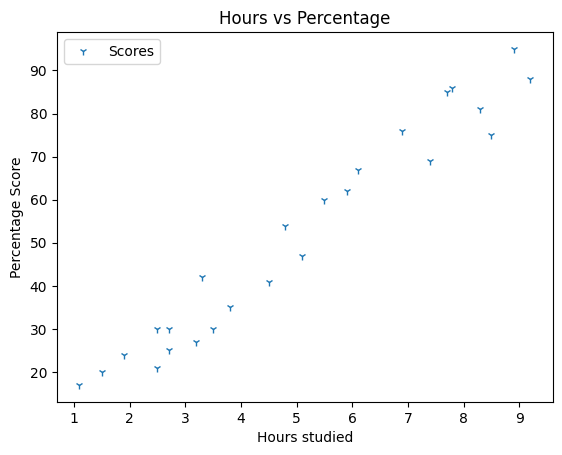

In [10]:
dataset.plot(x= 'Hours', y= 'Scores', style='1')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

Text(0.5, 1.0, 'Pie Chart')

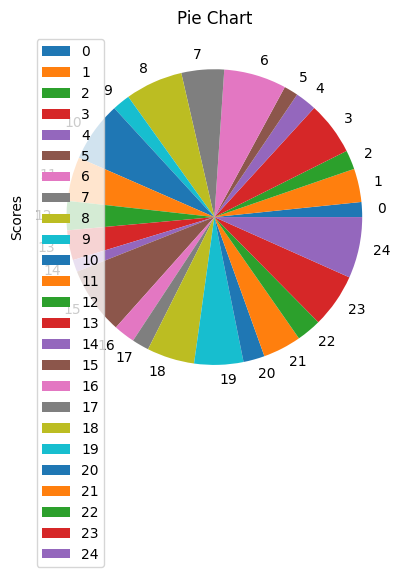

In [11]:
dataset.plot.pie(x='Hours',y='Scores')
plt.title('Pie Chart')

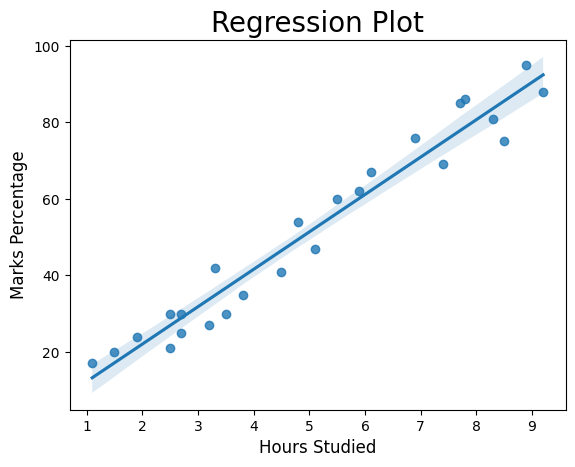

In [12]:
sns.regplot(x=dataset['Hours'],y= dataset['Scores'])
plt.title("Regression Plot", size=20)
plt.xlabel("Hours Studied",size=12)
plt.ylabel("Marks Percentage",size=12)
plt.show()

<Axes: xlabel='Hours', ylabel='Scores'>

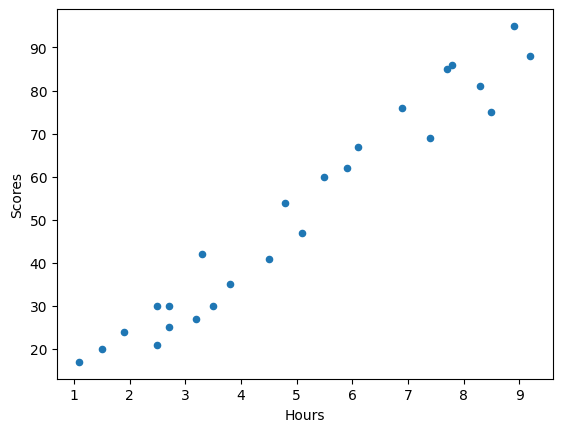

In [14]:
dataset.plot.scatter(x='Hours',y="Scores")

<Axes: xlabel='Hours'>

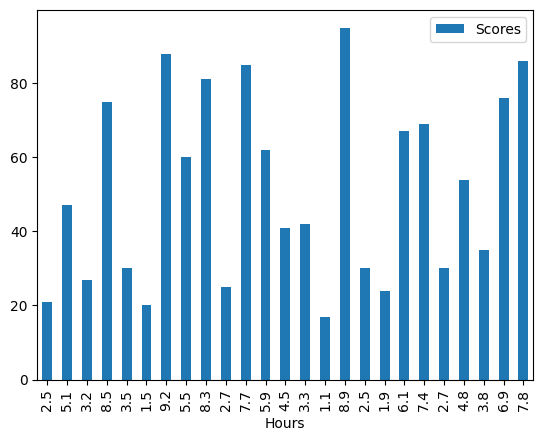

In [15]:
dataset.plot.bar(x='Hours',y="Scores")

<Axes: xlabel='Hours'>

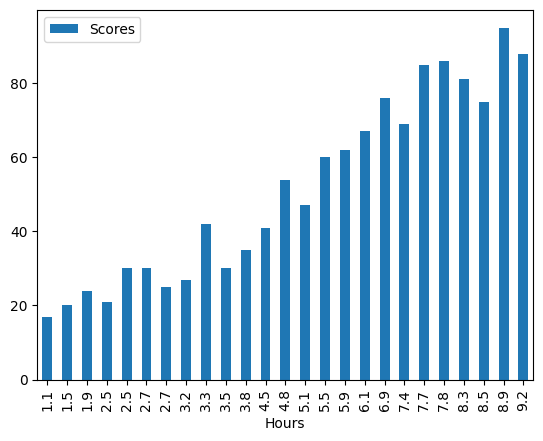

In [16]:
dataset.sort_values(["Hours"],axis=0,
                   ascending=[True],inplace=True)
dataset.head(10)
dataset.plot.bar(x='Hours',y="Scores")

In [21]:
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,1].values

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size=0.2,random_state=0)

# **Training the algorithm**

In [24]:
regression = LinearRegression()
regression.fit(X_train,y_train)
print("------Model Trained------")

------Model Trained------


# **Predicting the percentage of marks**

In [26]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours':[i[0] for i in X_test], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,2.7,28.617714
1,1.9,20.888033
2,7.7,76.928222
3,6.1,61.468859
4,4.5,46.009497


# **Comparing the Predicted Marks with Actual Marks**

In [28]:
compare_score = pd.DataFrame({'Actual Marks':y_test, 'Predicted Marks':pred_y})
compare_score

,Actual Marks,Predicted Marks
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


# **Visually comparing the Predicted Marks with the Actual Marks**

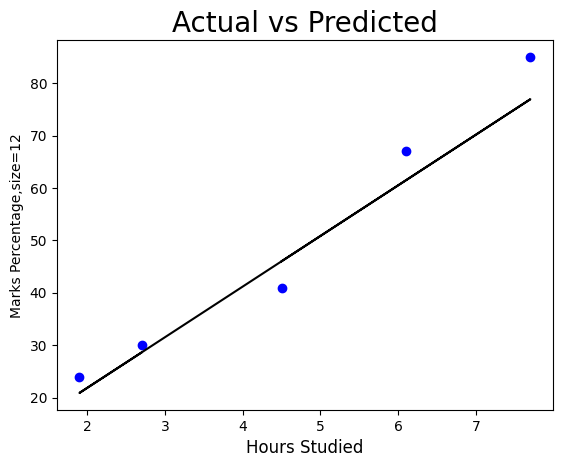

In [29]:
plt.scatter(x=X_test,y=y_test, color='blue')
plt.plot(X_test, pred_y,color='black')
plt.title("Actual vs Predicted", size=20)
plt.xlabel("Hours Studied",size=12)
plt.ylabel("Marks Percentage,size=12")
plt.show()

# **Evaluating the model**

In [34]:
#calculating the accuracy of the model

print('Mean absolute error: ', mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.621333622532767


# **What will be the Predicted score if a student studied 9.25 hrs/day ?**

In [36]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 91.904


**According to the regression model if a student studied for 9.25 hrs a day he/she is likely to score 91.904 marks**